## **Importing Dataset**


In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# Importing Libraries


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#Data **Preprocessing**

##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'http://localhost:8889/tree',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

NotFoundError: Could not find directory http://localhost:8889/tree

#validation image preprocessing


In [4]:
validation_dataset=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/foodrecog/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn=tf.keras.models.Sequential()

#Building Convolution layer

In [6]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:


cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:

cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:

cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling Training Phase

cnn.summary()

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [19]:

training_history = cnn.fit(x=training_set,validation_data=validation_dataset,epochs=32)

Epoch 1/32
98/98 [==============================] - 539s 5s/step - loss: 11.0070 - accuracy: 0.0333 - val_loss: 3.5824 - val_accuracy: 0.0285
Epoch 2/32
98/98 [==============================] - 161s 2s/step - loss: 3.5810 - accuracy: 0.0336 - val_loss: 3.5800 - val_accuracy: 0.0313
Epoch 3/32
98/98 [==============================] - 160s 2s/step - loss: 3.5691 - accuracy: 0.0403 - val_loss: 3.5754 - val_accuracy: 0.0342
Epoch 4/32
98/98 [==============================] - 160s 2s/step - loss: 3.5723 - accuracy: 0.0387 - val_loss: 3.5676 - val_accuracy: 0.0399
Epoch 5/32
98/98 [==============================] - 164s 2s/step - loss: 3.5552 - accuracy: 0.0426 - val_loss: 3.5585 - val_accuracy: 0.0513
Epoch 6/32
98/98 [==============================] - 157s 1s/step - loss: 3.5393 - accuracy: 0.0458 - val_loss: 3.5341 - val_accuracy: 0.0684
Epoch 7/32
98/98 [==============================] - 150s 1s/step - loss: 3.4097 - accuracy: 0.0726 - val_loss: 3.2168 - val_accuracy: 0.1111
Epoch 8/32
9

In [20]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


98/98 [==============================] - 105s 990ms/step - loss: 0.6312 - accuracy: 0.8221
Training accuracy: 0.8220800161361694


In [22]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_dataset)
print('Validation accuracy:', val_acc)


11/11 [==============================] - 16s 426ms/step - loss: 0.7404 - accuracy: 0.8091
Validation accuracy: 0.809116780757904


#Saving The Model

In [23]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
training_history.history #returns dict of history

{'loss': [11.006956100463867,
  3.580998420715332,
  3.5691401958465576,
  3.572309732437134,
  3.5552024841308594,
  3.53926682472229,
  3.409684658050537,
  3.312129259109497,
  3.1982040405273438,
  3.122631549835205,
  3.0017714500427246,
  2.914201021194458,
  2.7694122791290283,
  2.6603143215179443,
  2.5349674224853516,
  2.416879892349243,
  2.2665324211120605,
  2.1413469314575195,
  2.078986644744873,
  1.9006742238998413,
  1.8520207405090332,
  1.6922314167022705,
  1.6221219301223755,
  1.5671941041946411,
  1.4074900150299072,
  1.3466169834136963,
  1.2632654905319214,
  1.2230802774429321,
  1.1303952932357788,
  1.1699464321136475,
  1.036851406097412,
  0.986900806427002],
 'accuracy': [0.03328000009059906,
  0.03359999880194664,
  0.04032000154256821,
  0.03872000053524971,
  0.04255999997258186,
  0.04575999826192856,
  0.07264000177383423,
  0.08224000036716461,
  0.10047999769449234,
  0.12064000219106674,
  0.15263999998569489,
  0.1820800006389618,
  0.21792000

In [25]:
#recording history in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)



In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating accuracy of model acheived on validation set

In [27]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 80.9116780757904 %


#Accuracy Visualization

---



Training Visualization

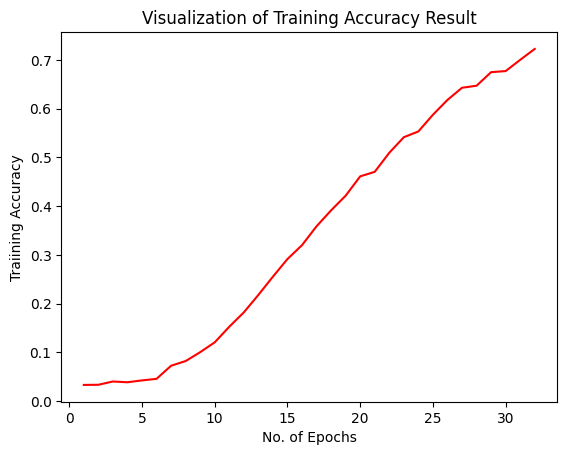

In [28]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

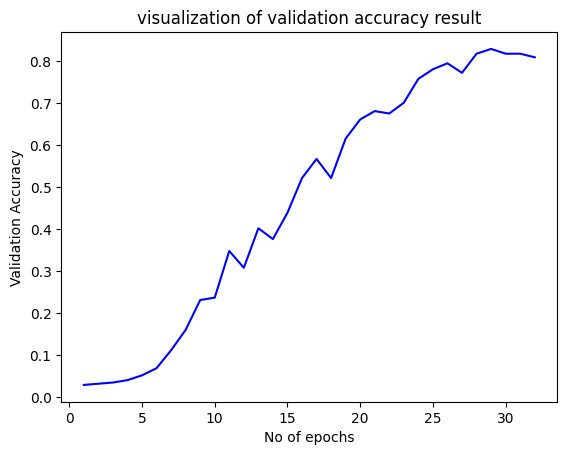

In [29]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No of epochs")
plt.ylabel("Validation Accuracy")
plt.title("visualization of validation accuracy result")
plt.show()

In [30]:
cnn.evaluate(training_set)

98/98 [==============================] - 112s 1s/step - loss: 0.6312 - accuracy: 0.8221


[0.6312403082847595, 0.8220800161361694]